# Récupération et tri des stations disponibles

> Récupération des stations des réseaux `FR`, `RD`, et `G` disponibles pendant la période de COVID-19 débutant le **15 Février 2020**.

## Importation des modules

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from seismic_noise import *

from obspy import UTCDateTime, read_inventory
from obspy.clients.fdsn import Client
from obspy.clients.fdsn.client import FDSNNoDataException

## Récupération des stations du territoire métropolitain

In [64]:
client = Client("RESIF")
tStart = UTCDateTime("2020-02-15")
tEnd = UTCDateTime("2021-06-30")
load_stations = False
st_file = "DATA/st_metadata/stations_fr.xml"

In [65]:
if load_stations:
    inventory = client.get_stations(network="FR,G,RD",
                                    location="00,,10",
                                    channel="EHZ,HHZ", # Eventuellement BHZ pour l'antarctique
                                    level="channel",
                                    starttime=tStart, endtime=tEnd,
                                    minlatitude=41, maxlatitude=52, minlongitude=-5, maxlongitude=10)
    inventory = inventory.remove(network="FR", station="STR", location="10", channel="HHZ")
    inventory = inventory.remove(network="FR", station="NIMR", location="10", channel="HHZ")
    inventory.write(st_file, format="STATIONXML")  

In [66]:
inventory = read_inventory(st_file)
inventory

Inventory created at 2021-07-15T15:01:28.000000Z
	Created by: RESIF WEB SERVICE: fdsnws-station | version: 1.1.1 
		    http://ws.resif.fr/fdsnws/station/1/query?starttime=2020-02-15T00%3...
	Sending institution: RESIF-SI (RESIF-DC)
	Contains:
		Networks (3):
			FR, G, RD
		Stations (163):
			FR.ABJF (Abjat-sur-Bandiat)
			FR.AGO (Saint-Agoulin)
			FR.AJAC (Ajaccio)
			FR.ARBF (technopole de l'Arbois)
			FR.ARTF (Artigues)
			FR.ATE (Arette)
			FR.BALS (Balsièges)
			FR.BANN (fort de Banne)
			FR.BARI (Barisis-aux-Bois)
			FR.BEGF (Béganne)
			FR.BESN (Besneville)
			FR.BETS (Betschdorf)
			FR.BIMF (Belle-Île-en-Mer)
			FR.BLAF (Les Blancs)
			FR.BOUC (Bouclans)
			FR.BOUF (Bouguenais)
			FR.BRGF (Bourganeuf)
			FR.BSCF (Bossay-sur-Claise)
			FR.BSTF (La Bastide-des-Jourdans)
			FR.CALF (plateau de Calern)
			FR.CAMF (Camaret-sur-Mer)
			FR.CARF (Carcanières)
			FR.CFF (63014, Aubière)
			FR.CHA2 (Chamrousse)
			FR.CHIF (Chizé)
			FR.CHLF (Chalmoux)
			FR.CHMF (Charmoille)
			FR.CIEL (

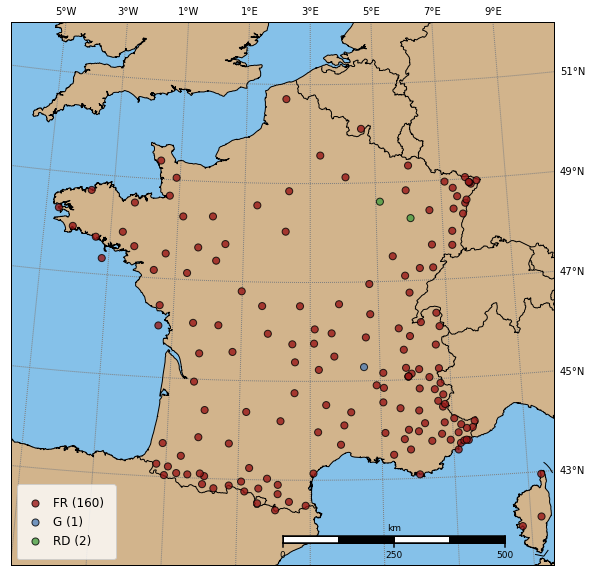

In [67]:
# Récupération des informations
lat = [ inventory.networks[j].stations[i].latitude for j in range(len(inventory.networks)) for i in range(len(inventory.networks[j].stations)) ]
lon = [ inventory.networks[j].stations[i].longitude for j in range(len(inventory.networks)) for i in range(len(inventory.networks[j].stations)) ]

code = inventory.get_contents()["channels"]
code_unique = []
for x in code:
    if x not in code_unique:
        code_unique.append(x)
code = code_unique
network = [ code_name.split(".")[0] for code_name in code ]
colors = list();
for code_name in code:
    network = code_name.split(".")[0]
    if network=="FR": colors.append("#991818")
    if network=="G" : colors.append("#537FB4")
    if network=="RD": colors.append("#499E42")
    

# Mise en graphique
plt.figure(figsize=(10,10))
latmin = 41
latmax = 52
lonmin = -5
lonmax = 11
resol = "h"
bar_width = 500
bar_pos = 4

# Définition du type de carte
m = Basemap(llcrnrlon=lonmin,llcrnrlat=latmin,urcrnrlon=lonmax,urcrnrlat=latmax,\
            width=12000000,height=9000000,\
            rsphere=(6378137.00,6356752.3142), epsg=5520,\
            resolution=resol,area_thresh=1000.,projection='cyl',\
            lat_1=latmin,lat_2=lonmin,lat_0=latmax,lon_0=lonmax)

m.drawcountries(linewidth=1, zorder=10)
m.drawcoastlines(linewidth=1, zorder=10)
parallels = np.arange(latmin, latmax,2.)
meridians = np.arange(lonmin, lonmax,2.)
m.drawparallels(parallels,labels=[False,True,True,False], color="gray", zorder=1, linewidth=1)
m.drawmeridians(meridians,labels=[False,True,True,False], color="gray", zorder=1, linewidth=1)
m.drawmapboundary(fill_color='#85C1E9')
m.fillcontinents(color='tan',lake_color='lightblue')
    
# Positionnement dans les coins
if   bar_pos==1: a, b, c = -0.35, +1, 95
elif bar_pos==2: a, b, c =   0.5, -1, 95
elif bar_pos==3: a, b, c = -0.35, +1, 8
else           : a, b, c =  0.36, -1, 7

lat_pos = np.linspace(latmin, latmax, 100)[c]
lon_pos = a*abs(lonmax-lonmin) + b*bar_width/111.0/2.0 + 4.2e-2*lat_pos
m.drawmapscale(lon_pos, lat_pos, lon_pos, lat_pos, bar_width, barstyle='fancy', zorder=100, yoffset=1500*abs(latmax-latmin))

lon, lat  = m(lon, lat)
m.scatter(lon, lat, s=50, marker="o", zorder=20, edgecolors='black', color=colors, alpha=0.8)

# Affichage de la légende
l1 = plt.scatter([],[], s=50, edgecolors='black', alpha=0.8, color="#991818")
l2 = plt.scatter([],[], s=50, edgecolors='black', alpha=0.8, color="#537FB4")
l3 = plt.scatter([],[], s=50, edgecolors='black', alpha=0.8, color="#499E42")

labels = ["FR ({})".format(len(inventory.networks[0])),
          "G ({})".format(len(inventory.networks[1])),
          "RD ({})".format(len(inventory.networks[2]))]

leg = plt.legend([l1, l2, l3], labels, ncol=1, frameon=True, fontsize=12,
                 handlelength=1, loc=3, borderpad = 1, handletextpad=1,scatterpoints = 1)

## Récupération des stations en Antarctique

In [68]:
client = Client("RESIF")
load_stations = False
st_file = "DATA/st_metadata/stations_antartctic.xml"

In [69]:
if load_stations:
    inventory = client.get_stations(network="G",
                                    station="CCD,DRV",
                                    location="00",
                                    channel="BHZ,EHZ,HHZ", # Eventuellement BHZ pour l'antarctique
                                    level="channel")
    inventory.write(st_file, format="STATIONXML")  

In [70]:
inventory = read_inventory(st_file)
inventory

Inventory created at 2021-07-15T15:01:36.000000Z
	Created by: RESIF WEB SERVICE: fdsnws-station | version: 1.1.1 
		    http://ws.resif.fr/fdsnws/station/1/query?network=G&station=CCD%2CD...
	Sending institution: RESIF-SI (RESIF-DC)
	Contains:
		Networks (1):
			G
		Stations (2):
			G.CCD (Concordia Base, Dome C, Antartica)
			G.DRV (Dumont d'Urville - Terre Adelie, Antarctica)
		Channels (6):
			G.CCD.00.BHZ (2x), G.DRV.00.BHZ (4x)

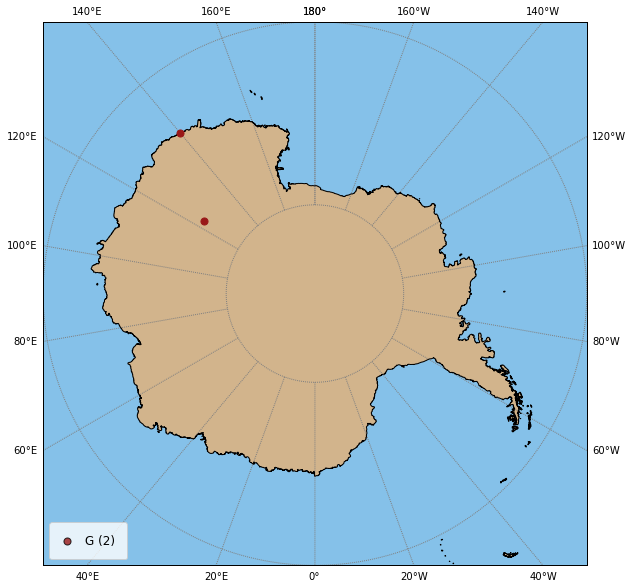

In [84]:
# Récupération des informations
lat = [ inventory.networks[j].stations[i].latitude for j in range(len(inventory.networks)) for i in range(len(inventory.networks[j].stations)) ]
lon = [ inventory.networks[j].stations[i].longitude for j in range(len(inventory.networks)) for i in range(len(inventory.networks[j].stations)) ]

code = inventory.get_contents()["channels"]
code_unique = []
for x in code:
    # check if exists in unique_list or not
    if x not in code_unique:
        code_unique.append(x)
code = code_unique

# Mise en graphique
plt.figure(figsize=(10,10))
resol = "h"

# Définition du type de carte
m = Basemap(projection='spstere', boundinglat=-60, lon_0=0, resolution=resol)

m.fillcontinents(color='gray',lake_color='gray')
m.drawcountries(linewidth=1, zorder=10)
m.drawcoastlines(linewidth=1, zorder=10)
m.drawparallels(np.arange(-80.,81.,20.),labels=[False,False,False,False], color="gray", zorder=1, linewidth=1)
m.drawmeridians(np.arange(-180.,181.,20.),labels=[True,True,True,True], color="gray", zorder=1, linewidth=1)
m.drawmapboundary(fill_color='#85C1E9')
m.fillcontinents(color='tan',lake_color='lightblue')    

lon, lat  = m(lon, lat)
m.scatter(lon, lat, s=50, marker="o", zorder=20,edgecolors='black', color="#991818")

# Affichage de la légende
l1 = plt.scatter([],[], s=50, edgecolors='black', alpha=0.8, color="#991818")

labels = ["G ({})".format(len(inventory.networks[0]))]

leg = plt.legend([l1], labels, ncol=1, frameon=True, fontsize=12,
                 handlelength=1, loc=3, borderpad = 1, handletextpad=1,scatterpoints = 1)